# Dat Analytics - Housing Data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
## TO remove warning from notebook
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [2]:
df = pd.read_csv("housing_data.csv")
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
## Check Null  values

In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
nc = [feature for feature in df.columns if df[feature].dtype != 'O']
nc

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [8]:
for i in nc:
    df[i].fillna(df[i].median(),inplace = True)

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Feature Selection

## Heat Map

<AxesSubplot: >

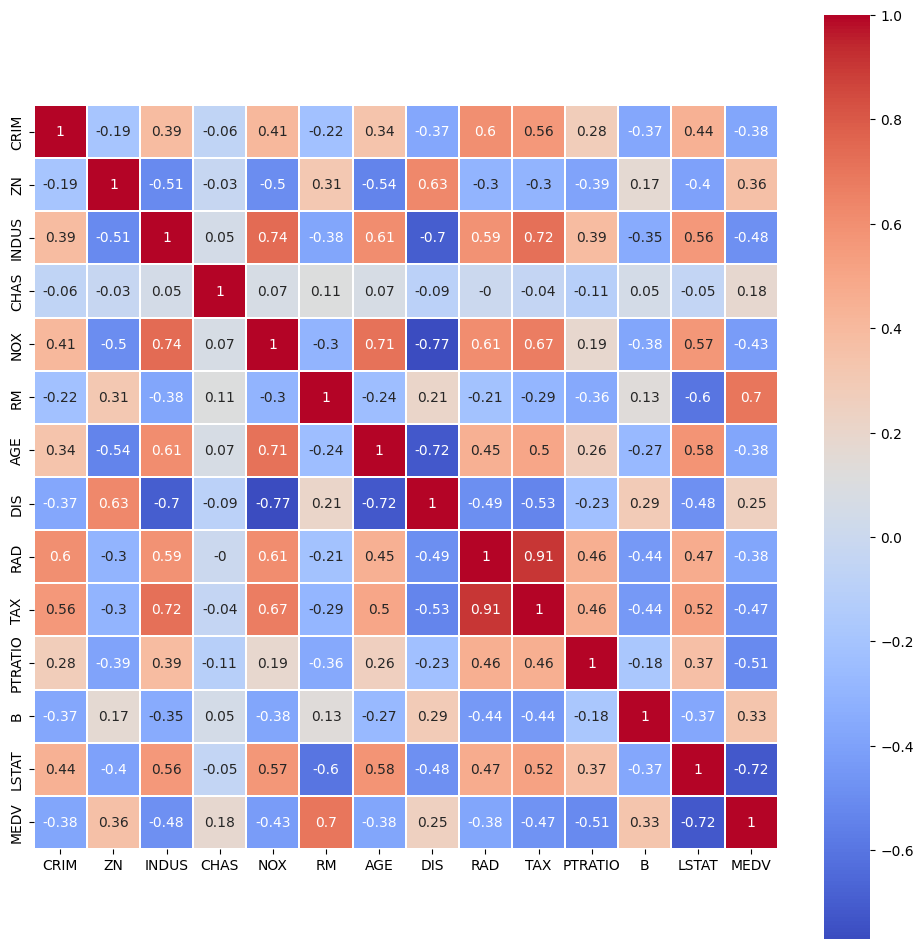

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2), annot=True, cmap='coolwarm',linewidths=0.2,square=True)

In [11]:
df1 = df[['RM','LSTAT','TAX','PTRATIO','MEDV']]

In [12]:
df1

,RM,LSTAT,TAX,PTRATIO,MEDV
0,6.575,4.98,296,15.3,24.0
1,6.421,9.14,242,17.8,21.6
2,7.185,4.03,242,17.8,34.7
3,6.998,2.94,222,18.7,33.4
4,7.147,11.43,222,18.7,36.2
...,...,...,...,...,...
501,6.593,11.43,273,21.0,22.4
502,6.120,9.08,273,21.0,20.6
503,6.976,5.64,273,21.0,23.9
504,6.794,6.48,273,21.0,22.0


In [13]:
df1.head()

,RM,LSTAT,TAX,PTRATIO,MEDV
0,6.575,4.98,296,15.3,24.0
1,6.421,9.14,242,17.8,21.6
2,7.185,4.03,242,17.8,34.7
3,6.998,2.94,222,18.7,33.4
4,7.147,11.43,222,18.7,36.2


## Pair Plot

[]

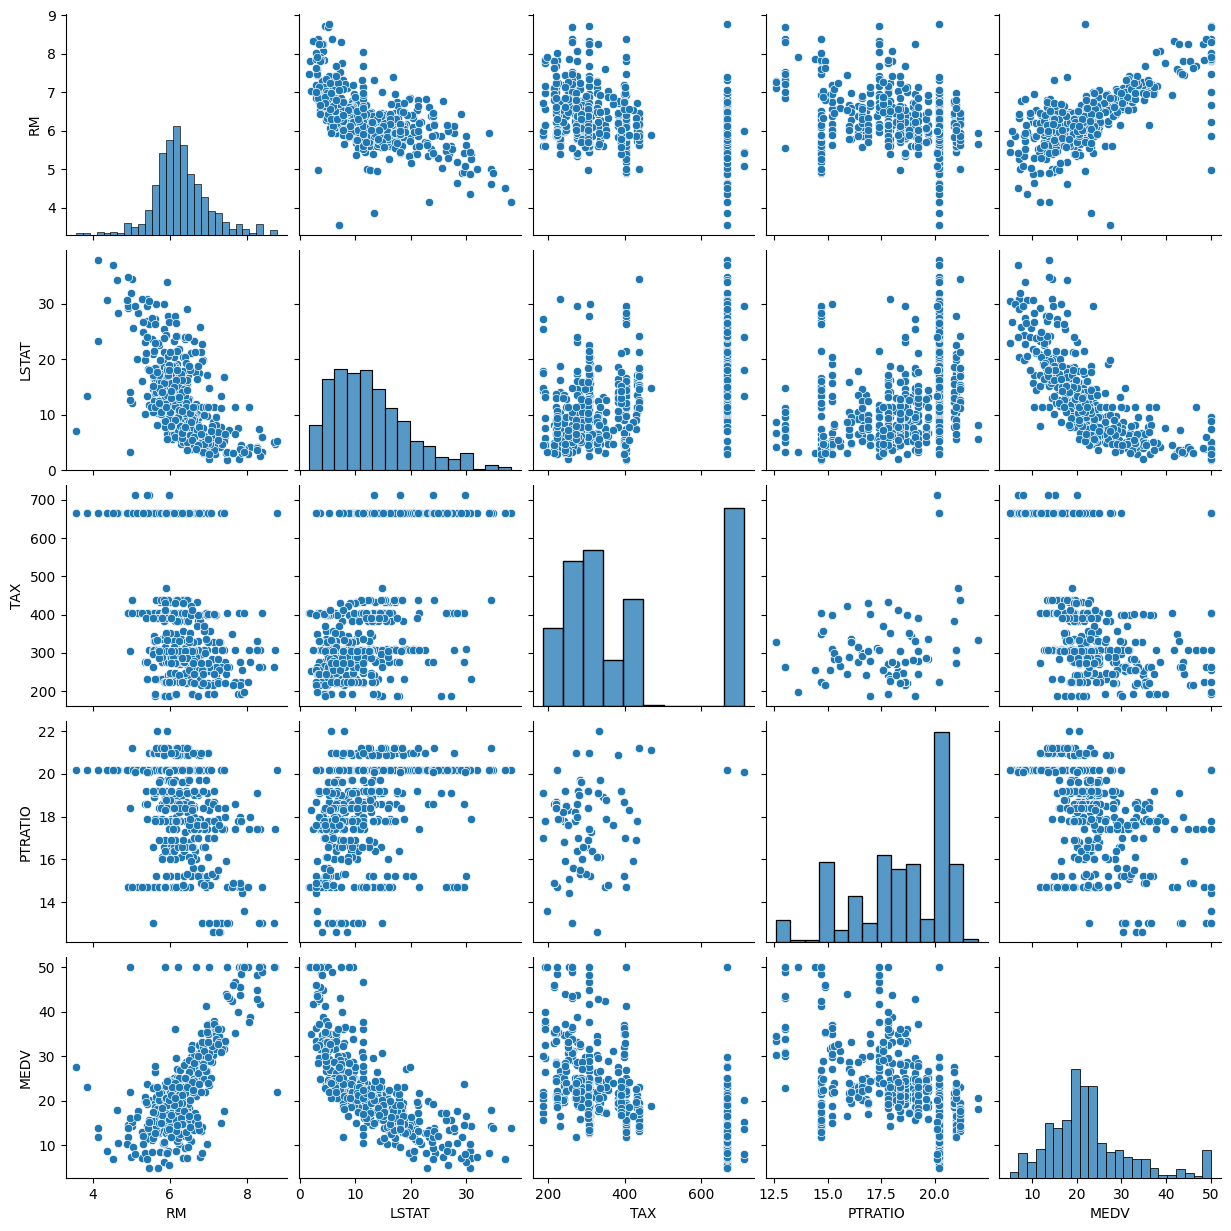

In [14]:
sns.pairplot(df1)
plt.plot()

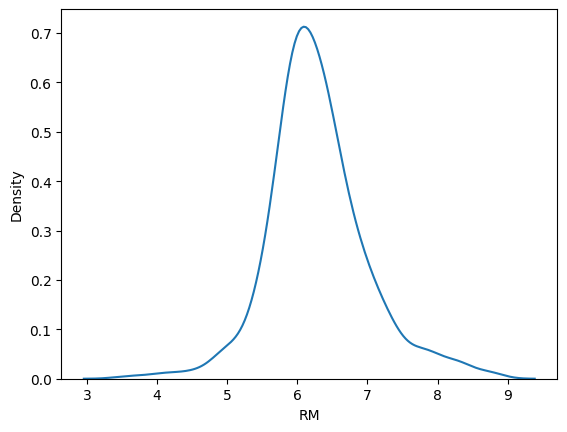

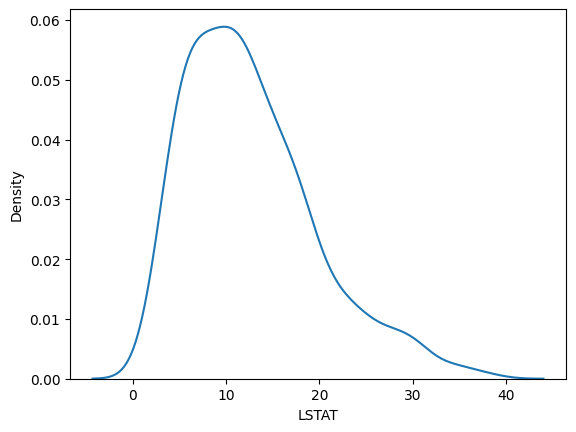

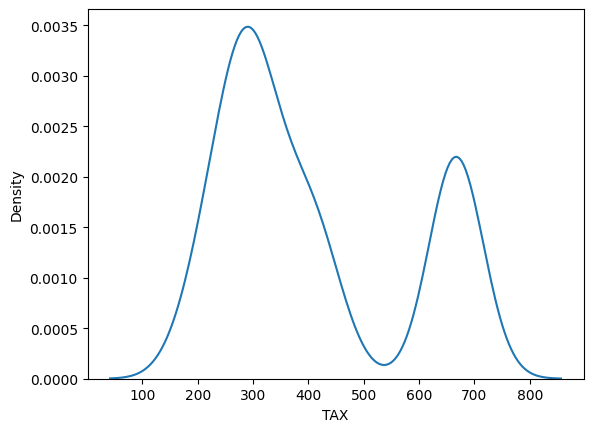

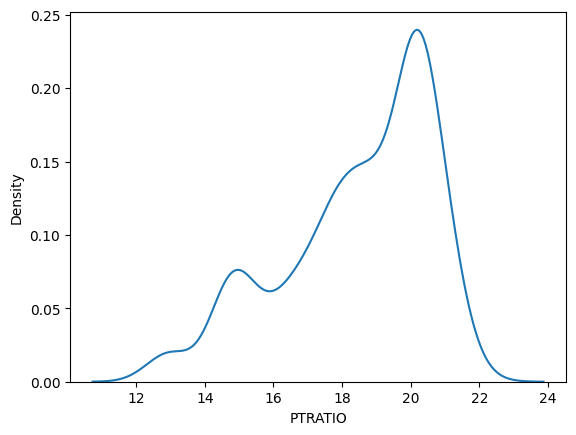

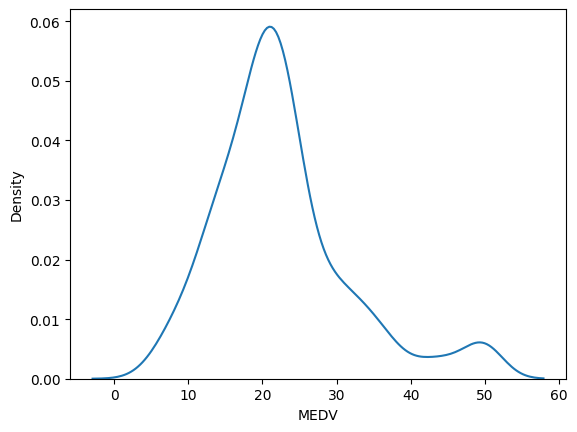

In [99]:


for i in df1.columns:
    sns.kdeplot(df1[i])
    plt.show()


In [16]:
df1.describe().round(2)

,RM,LSTAT,TAX,PTRATIO,MEDV
count,506.00,506.00,506.00,506.00,506.00
mean,6.28,12.66,408.24,18.46,22.53
std,0.70,7.02,168.54,2.16,9.20
min,3.56,1.73,187.00,12.60,5.00
25%,5.89,7.23,279.00,17.40,17.02
50%,6.21,11.43,330.00,19.05,21.20
75%,6.62,16.57,666.00,20.20,25.00
max,8.78,37.97,711.00,22.00,50.00


In [17]:
## Univariant Analysis

<AxesSubplot: >

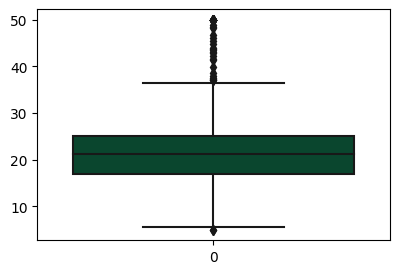

In [75]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(df1.MEDV,color='#005030')

<AxesSubplot: xlabel='MEDV', ylabel='Density'>

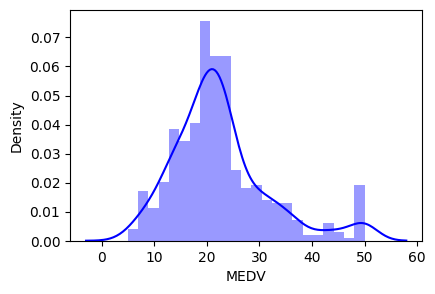

In [76]:
plt.figure(figsize=(10,3))
plt.title("Distribution Plot of MEDV")
plt.subplot(1,2,1)
sns.distplot(df1.MEDV,color='blue')

In [20]:
# ## Handle Outliers I+Using IQR
# for col in df1.columns:
#     Q1 = df1[col].quantile(0.25)
#     Q3 = df1[col].quantile(0.75)
#     IQR = Q3-Q1
#     lb = Q1 - 1.5*IQR
#     ub = Q3 + 1.5*IQR


In [21]:
desc = df1.describe().round(2)

In [22]:
MEDV_Q3 = desc['MEDV']['75%']
MEDV_Q1 = desc['MEDV']['25%']
MEDV_IQR = MEDV_Q3-MEDV_Q1

MEDV_lb = MEDV_Q1-1.5*MEDV_IQR
MEDV_ub = MEDV_Q3+1.5*MEDV_IQR

In [23]:
df1[df1['MEDV']<MEDV_lb]

,RM,LSTAT,TAX,PTRATIO,MEDV
398,5.453,30.59,666,20.2,5.0
405,5.683,22.98,666,20.2,5.0


In [24]:
df1[df1['MEDV']>MEDV_ub].sort_values(by=['MEDV','RM'])

,RM,LSTAT,TAX,PTRATIO,MEDV
190,6.951,5.10,398,15.2,37.0
179,6.980,5.04,193,17.8,37.2
291,7.148,3.56,245,19.2,37.3
226,8.040,11.43,307,17.4,37.6
182,7.155,4.82,193,17.8,37.9
97,8.069,4.21,276,18.0,38.7
180,7.765,7.56,193,17.8,39.8
157,6.943,4.59,403,14.7,41.3
232,8.337,2.47,307,17.4,41.7
202,7.610,3.11,348,14.7,42.3


* With the observation when MEDV = 50 there is variation in values of RM . hence remove entries

In [25]:
df1.shape

(506, 5)

In [26]:
df2=df1[df1['MEDV']<50].sort_values(by=['MEDV','RM'])
df2

,RM,LSTAT,TAX,PTRATIO,MEDV
398,5.453,30.59,666,20.2,5.0
405,5.683,22.98,666,20.2,5.0
400,5.987,26.77,666,20.2,5.6
399,5.852,29.97,666,20.2,6.3
414,4.519,36.98,666,20.2,7.0
...,...,...,...,...,...
282,7.645,3.01,216,14.9,46.0
228,7.686,11.43,307,17.4,46.7
233,8.247,3.95,307,17.4,48.3
203,7.853,3.81,224,14.7,48.5


In [27]:
### Now we are observing for feature TAX

<AxesSubplot: >

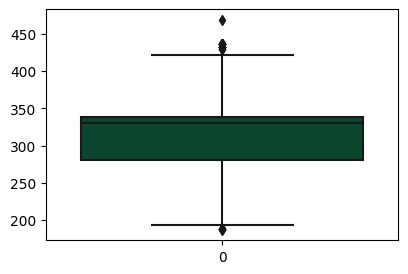

In [80]:
plt.figure(figsize=(10,3))
plt.title("BOXPLOT of TAX")
plt.subplot(1,2,1)
sns.boxplot(df2.TAX,color='#005030')

<AxesSubplot: xlabel='TAX', ylabel='Density'>

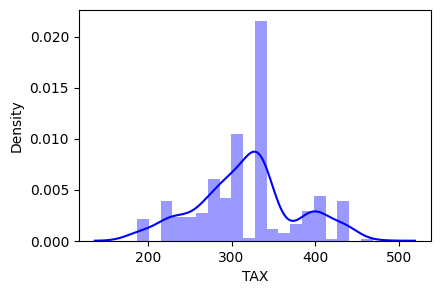

In [78]:
plt.figure(figsize=(10,3))
plt.title("Distribution Plot of MEDV")
plt.subplot(1,2,1)
sns.distplot(df2.TAX,color='blue')


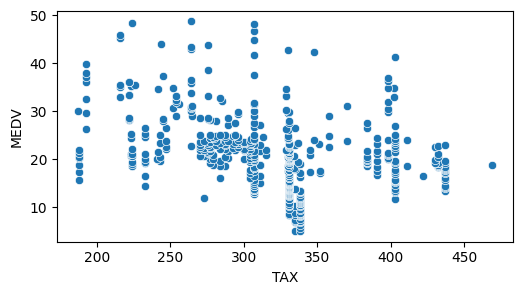

In [82]:
plt.figure(figsize=(20,3))
plt.title("Scatter plot of TAV v/s MEDV")
plt.subplot(1,3,3)
sns.scatterplot(x=df2.TAX,y=df2.MEDV)
plt.show()

In [31]:
temp_df = df2[df1['TAX']>600].sort_values(by=['MEDV','RM'])
temp_df.shape

(132, 5)

In [32]:
temp_df.describe()

,RM,LSTAT,TAX,PTRATIO,MEDV
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.000689,18.828864,667.704545,20.196212,14.994697
std,0.712621,6.590380,8.623365,0.019163,5.405825
min,3.561000,5.290000,666.000000,20.100000,5.000000
25%,5.674250,14.175000,666.000000,20.200000,10.900000
50%,6.139500,17.910000,666.000000,20.200000,14.100000
75%,6.407250,23.052500,666.000000,20.200000,19.200000
max,8.780000,37.970000,711.000000,20.200000,29.800000


In [33]:
temp_df

,RM,LSTAT,TAX,PTRATIO,MEDV
398,5.453,30.59,666,20.2,5.0
405,5.683,22.98,666,20.2,5.0
400,5.987,26.77,666,20.2,5.6
399,5.852,29.97,666,20.2,6.3
414,4.519,36.98,666,20.2,7.0
...,...,...,...,...,...
482,7.061,7.01,666,20.2,25.0
365,3.561,7.12,666,20.2,27.5
409,6.852,19.78,666,20.2,27.5
407,5.608,11.43,666,20.2,27.9


In [34]:
## Performing Imputation for TAX as some unusual values have been observed
TAX_10 = df2[(df2['TAX']<600) & (df2['LSTAT']>=0) & (df2['LSTAT']<10)]['TAX'].mean()
TAX_20 = df2[(df2['TAX']<600) & (df2['LSTAT']>=10) & (df2['LSTAT']<20)]['TAX'].mean()
TAX_30 = df2[(df2['TAX']<600) & (df2['LSTAT']>=20) & (df2['LSTAT']<30)]['TAX'].mean()
TAX_40 = df2[(df2['TAX']<600) & (df2['LSTAT']>=30)]['TAX'].mean()

indexes = list(df2.index)
for i in indexes:
    if df2['TAX'][i] > 600:
        if (0 <= df2['LSTAT'][i] < 10):
            df2.at[i,'TAX'] = TAX_10
        elif (10 <= df2['LSTAT'][i] < 20):
            df2.at[i,'TAX'] = TAX_20
        elif (20 <= df2['LSTAT'][i] < 30):
            df2.at[i,'TAX'] = TAX_30
        elif (df2['LSTAT'][i] >30):
            df2.at[i,'TAX'] = TAX_40

print('Values imputed successfully')

Values imputed successfully


In [35]:
## To whether values imputed  or not
df2[df2['TAX']>600]['TAX'].count()

0

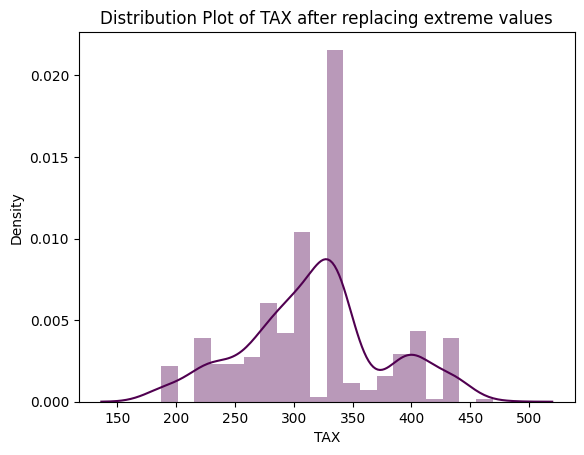

In [36]:
sns.distplot(a=df2.TAX,color='#500050')
plt.title('Distribution Plot of TAX after replacing extreme values')
plt.show()

In [37]:
## Now observing for feature PTRATIO

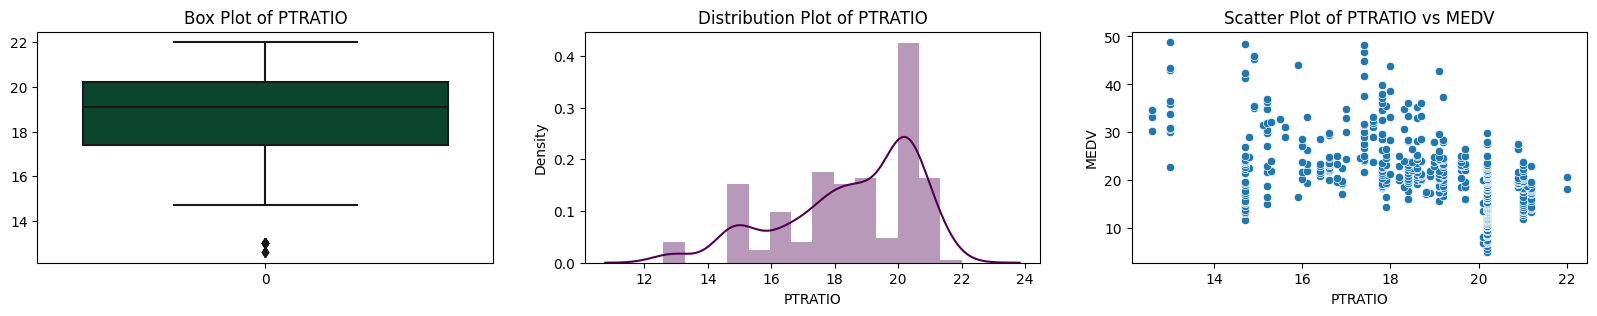

In [38]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.PTRATIO,color='#005030')
plt.title('Box Plot of PTRATIO')

plt.subplot(1,3,2)
sns.distplot(a=df2.PTRATIO,color='#500050')
plt.title('Distribution Plot of PTRATIO')

plt.subplot(1,3,3)
sns.scatterplot(x=df2.PTRATIO,y=df2.MEDV)
plt.title('Scatter Plot of PTRATIO vs MEDV')

plt.show()

In [39]:
## By observing distplot we can conclude that PTRATIO is not
## normally distributed

In [40]:
df2[df2['PTRATIO']<14].sort_values(by=['LSTAT','MEDV'])

,RM,LSTAT,TAX,PTRATIO,MEDV
268,7.470,3.16,264.0,13.0,43.5
196,7.287,4.08,329.0,12.6,33.3
262,8.398,5.91,264.0,13.0,48.8
198,7.274,6.62,329.0,12.6,34.6
259,6.842,6.90,264.0,13.0,30.1
261,7.520,7.26,264.0,13.0,43.1
258,7.333,7.79,264.0,13.0,36.0
264,7.206,8.10,264.0,13.0,36.5
197,7.107,8.61,329.0,12.6,30.3
260,7.203,9.59,264.0,13.0,33.8


In [41]:
## No unusual observation in abovve data

In [42]:
## Now check for LSTAT

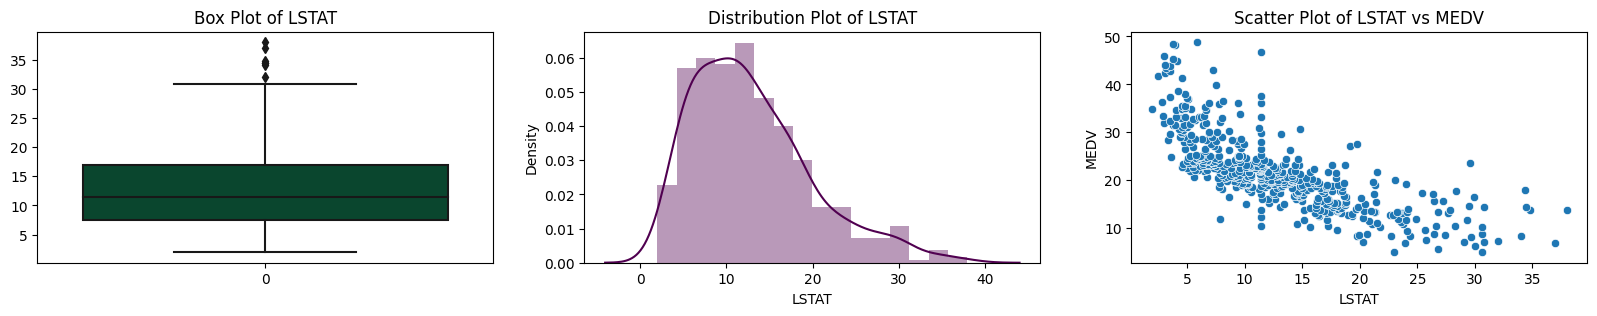

In [43]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.LSTAT,color='#005030')
plt.title('Box Plot of LSTAT')

plt.subplot(1,3,2)
sns.distplot(a=df2.LSTAT,color='#500050')
plt.title('Distribution Plot of LSTAT')

plt.subplot(1,3,3)
sns.scatterplot(x=df2.LSTAT,y=df2.MEDV)
plt.title('Scatter Plot of LSTAT vs MEDV')

plt.show()

In [44]:
## Right Skwed data but  normally distributed

In [45]:
LSTAT_Q3 = desc['LSTAT']['75%']
LSTAT_Q1 = desc['LSTAT']['25%']
LSTAT_IQR = LSTAT_Q3 - LSTAT_Q1
LSTAT_UV = LSTAT_Q3 + 1.5*LSTAT_IQR
LSTAT_LV = LSTAT_Q1 - 1.5*LSTAT_IQR

df2[df2['LSTAT']>LSTAT_UV].sort_values(by='LSTAT')

,RM,LSTAT,TAX,PTRATIO,MEDV
398,5.453,30.59,335.0,20.2,5.0
388,4.880,30.62,335.0,20.2,10.2
384,4.368,30.63,335.0,20.2,8.8
385,5.277,30.81,335.0,20.2,7.2
48,5.399,30.81,233.0,17.9,14.4
387,5.000,31.99,335.0,20.2,7.4
438,5.935,34.02,335.0,20.2,8.4
412,4.628,34.37,335.0,20.2,17.9
141,5.019,34.41,437.0,21.2,14.4
373,4.906,34.77,335.0,20.2,13.8


In [46]:
## Checking the feature RM

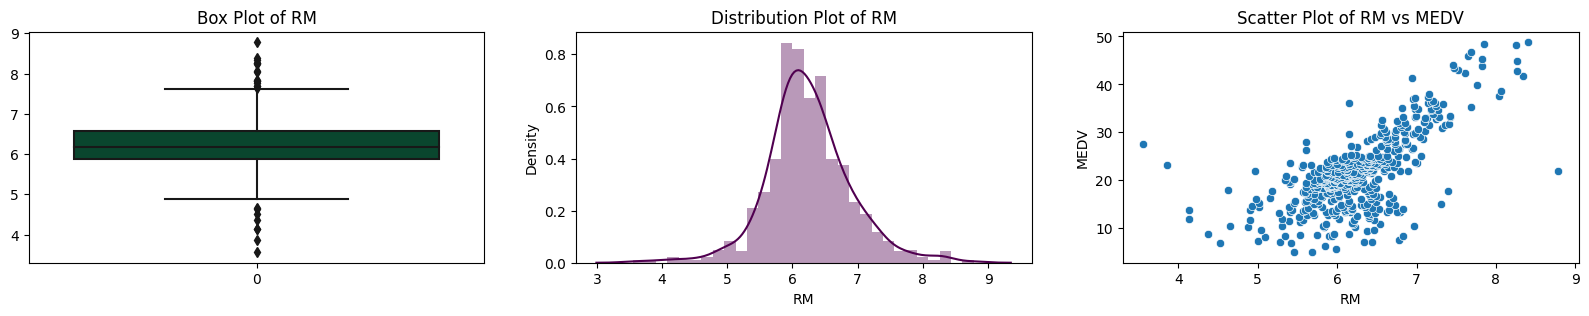

In [47]:
plt.figure(figsize=(20,3))

plt.subplot(1,3,1)
sns.boxplot(df2.RM,color='#005030')
plt.title('Box Plot of RM')

plt.subplot(1,3,2)
sns.distplot(a=df2.RM,color='#500050')
plt.title('Distribution Plot of RM')

plt.subplot(1,3,3)
sns.scatterplot(x=df2.RM,y=df2.MEDV)
plt.title('Scatter Plot of RM vs MEDV')

plt.show()

In [48]:
RM_Q3 = desc['RM']['75%']
RM_Q1 = desc['RM']['25%']
RM_IQR = RM_Q3 - RM_Q1
RM_UV = RM_Q3 + 1.5*RM_IQR
RM_LV = RM_Q1 - 1.5*RM_IQR

df2[df2['RM']<RM_LV].sort_values(by=['RM','MEDV'])

,RM,LSTAT,TAX,PTRATIO,MEDV
365,3.561,7.12,294.139785,20.2,27.5
367,3.863,13.33,330.770270,20.2,23.1
406,4.138,23.34,338.636364,20.2,11.9
374,4.138,37.97,335.000000,20.2,13.8
384,4.368,30.63,335.000000,20.2,8.8
414,4.519,36.98,335.000000,20.2,7.0
412,4.628,34.37,335.000000,20.2,17.9
386,4.652,28.28,338.636364,20.2,10.5


In [49]:
print(f'Shape of dataset before removing data points: {df2.shape}')
df3 = df2.drop(axis=0,index=[365,367])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (490, 5)
Shape of dataset before removing data points: (488, 5)


In [50]:
df3[df3['RM']>RM_UV].sort_values(by=['RM','MEDV'])

,RM,LSTAT,TAX,PTRATIO,MEDV
180,7.765,7.56,193.000000,17.8,39.8
98,7.820,3.57,276.000000,18.0,43.8
280,7.820,3.76,216.000000,14.9,45.4
203,7.853,3.81,224.000000,14.7,48.5
226,8.040,11.43,307.000000,17.4,37.6
97,8.069,4.21,276.000000,18.0,38.7
233,8.247,3.95,307.000000,17.4,48.3
253,8.259,3.54,330.000000,19.1,42.8
224,8.266,4.14,307.000000,17.4,44.8
232,8.337,2.47,307.000000,17.4,41.7


In [51]:
print(f'Shape of dataset before removing data points: {df3.shape}')
df3 = df3.drop(axis=0,index=[364])
print(f'Shape of dataset before removing data points: {df3.shape}')

Shape of dataset before removing data points: (488, 5)
Shape of dataset before removing data points: (487, 5)


## SPLITTING THE DATA

In [52]:
#Now will split our dataset into Dependent variable and Independent variable

X = df3.iloc[:,0:4].values
y = df3.iloc[:,-1:].values

In [53]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (487, 4)
Shape of Independent Variable y = (487, 1)


## FEATURE SCALING

In [54]:
def FeatureScaling(X):

    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i]-mean[i])/std[i]

    return X

In [55]:
X = FeatureScaling(X)

In [56]:
m,n = X.shape
X = np.append(arr=np.ones((m,1)),values=X,axis=1)

## Train the data 

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (389, 5)
Shape of X_test = (98, 5)
Shape of y_train = (389, 1)
Shape of y_test = (98, 1)


## Multiple Linear Regression Model

In [58]:
def ComputeCost(X,y,theta):

    m=X.shape[0] #number of data points in the set
    J = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    return J

In [59]:
#Gradient Descent Algorithm to minimize the Cost and find best parameters in order to get best line for our dataset

def GradientDescent(X,y,theta,alpha,no_of_iters):
    m=X.shape[0]
    J_Cost = []
    for i in range(no_of_iters):
        error = np.dot(X.transpose(),(X.dot(theta)-y))
        theta = theta - alpha * (1/m) * error
        J_Cost.append(ComputeCost(X,y,theta))

    return theta, np.array(J_Cost)

In [60]:
iters = 1000

alpha1 = 0.001
theta1 = np.zeros((X_train.shape[1],1))
theta1, J_Costs1 = GradientDescent(X_train,y_train,theta1,alpha1,iters)

alpha2 = 0.003
theta2 = np.zeros((X_train.shape[1],1))
theta2, J_Costs2 = GradientDescent(X_train,y_train,theta2,alpha2,iters)

alpha3 = 0.01
theta3 = np.zeros((X_train.shape[1],1))
theta3, J_Costs3 = GradientDescent(X_train,y_train,theta3,alpha3,iters)

alpha4 = 0.03
theta4 = np.zeros((X_train.shape[1],1))
theta4, J_Costs4 = GradientDescent(X_train,y_train,theta4,alpha4,iters)

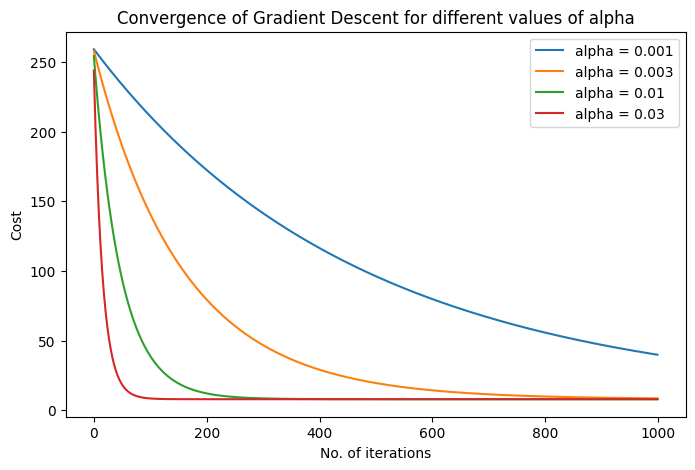

In [61]:
plt.figure(figsize=(8,5))
plt.plot(J_Costs1,label = 'alpha = 0.001')
plt.plot(J_Costs2,label = 'alpha = 0.003')
plt.plot(J_Costs3,label = 'alpha = 0.01')
plt.plot(J_Costs4,label = 'alpha = 0.03')
plt.title('Convergence of Gradient Descent for different values of alpha')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [62]:
theta4

array([[21.54687154],
       [ 3.13762495],
       [-2.59944591],
       [-1.09593223],
       [-2.08103859]])

In [63]:
def Predict(X,theta):
    y_pred = X.dot(theta)
    return y_pred

In [64]:
y_pred = Predict(X_test,theta4)
y_pred[:5]

array([[17.54791827],
       [23.17808358],
       [29.7161842 ],
       [20.04954155],
       [26.79459549]])

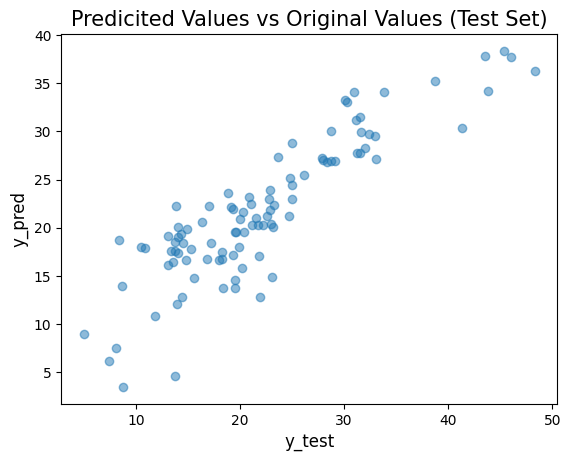

In [65]:
plt.scatter(x=y_test,y=y_pred,alpha=0.5)
plt.xlabel('y_test',size=12)
plt.ylabel('y_pred',size=12)
plt.title('Predicited Values vs Original Values (Test Set)',size=15)
plt.show()

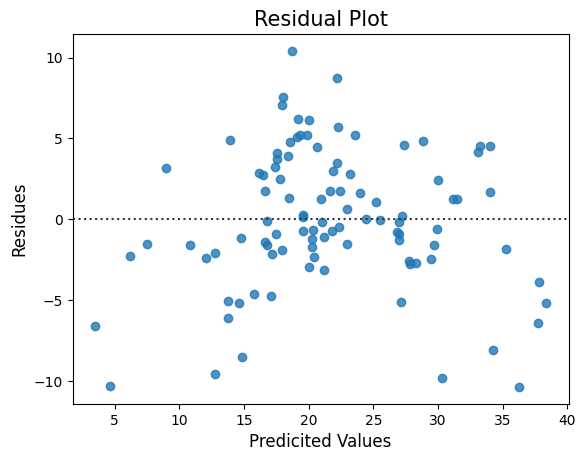

In [66]:
sns.residplot(x=y_pred,y=(y_pred-y_test))
plt.xlabel('Predicited Values',size=12)
plt.ylabel("Residues",size=12)
plt.title('Residual Plot',size=15)
plt.show()

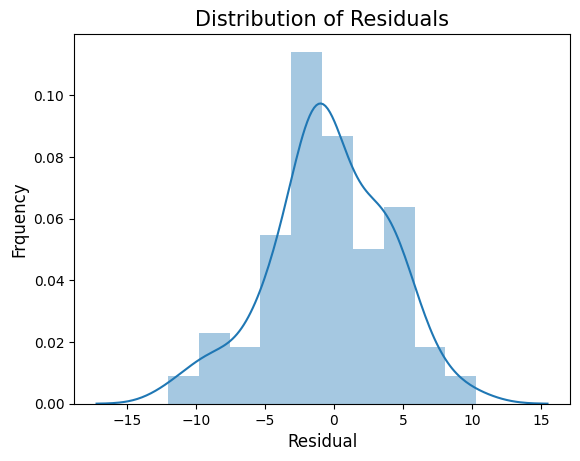

In [67]:
sns.distplot(y_pred-y_test)
plt.xlabel('Residual',size=12)
plt.ylabel('Frquency',size=12)
plt.title('Distribution of Residuals',size=15)
plt.show()

## EVALUATION

In [68]:
from sklearn import metrics
r2= metrics.r2_score(y_test,y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
print(f'R^2 = {r2}')
print(f'Adjusted R^2 = {adj_r2}')

R^2 = 0.7729424445651353
Adjusted R^2 = 0.7606023600306318


In [69]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f'Mean Squared Error: {mse}',f'Mean Absolute Error: {mae}',f'Root Mean Squared Error: {rmse}',sep='\n')

Mean Squared Error: 18.50526831362888
Mean Absolute Error: 3.3478420556094606
Root Mean Squared Error: 4.301775018946119


## Model Interpretation

In [70]:
#coefficients of regression model
coeff=np.array([y for x in theta4 for y in x]).round(2)
features=['Bias','RM','TAX','PTRATIO','LSTAT']
eqn = 'MEDV = '
for f,c in zip(features,coeff):
    eqn+=f" + ({c} * {f})";

print(eqn)

MEDV =  + (21.55 * Bias) + (3.14 * RM) + (-2.6 * TAX) + (-1.1 * PTRATIO) + (-2.08 * LSTAT)


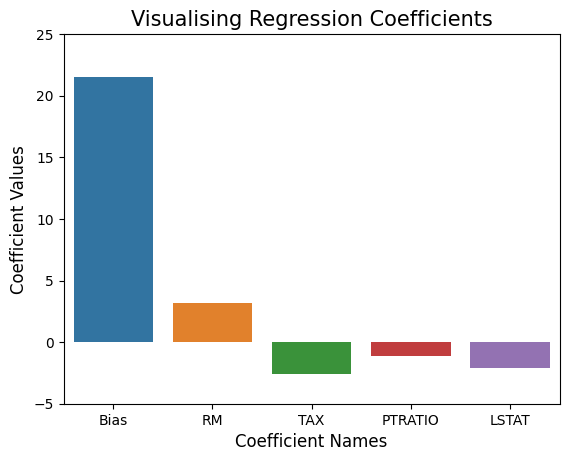

In [71]:
sns.barplot(x=features,y=coeff)
plt.ylim([-5,25])
plt.xlabel('Coefficient Names',size=12)
plt.ylabel('Coefficient Values',size=12)
plt.title('Visualising Regression Coefficients',size=15)
plt.show()